In [ ]:
filelist=[]

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        filelist.append(os.path.join(dirname,filename))


In [ ]:
len(filelist)

13185

In [ ]:
filelist

['/kaggle/input/identifying-different-breeds-of-snakes/dataset/nerodia-sipedon/1d859d6270.jpg',
 '/kaggle/input/identifying-different-breeds-of-snakes/dataset/nerodia-sipedon/79eddb7fd7.jpg',
 '/kaggle/input/identifying-different-breeds-of-snakes/dataset/nerodia-sipedon/7d5ac182b4.jpg',
 '/kaggle/input/identifying-different-breeds-of-snakes/dataset/nerodia-sipedon/389aa867f9.jpg',
 '/kaggle/input/identifying-different-breeds-of-snakes/dataset/nerodia-sipedon/670f7d0944.jpg',
 '/kaggle/input/identifying-different-breeds-of-snakes/dataset/nerodia-sipedon/407cf0034e.jpg',
 '/kaggle/input/identifying-different-breeds-of-snakes/dataset/nerodia-sipedon/f9be95633c.jpg',
 '/kaggle/input/identifying-different-breeds-of-snakes/dataset/nerodia-sipedon/046d4cbe37.jpg',
 '/kaggle/input/identifying-different-breeds-of-snakes/dataset/nerodia-sipedon/88d8094d2e.jpg',
 '/kaggle/input/identifying-different-breeds-of-snakes/dataset/nerodia-sipedon/494791d513.jpg',
 '/kaggle/input/identifying-different-br

In [ ]:
Filepaths= []
labels = []

for image_file in filelist:
    label = image_file.split(os.path.sep)[-2]
    Filepaths.append(image_file)
    labels.append(label)

In [ ]:
set(labels)
len(set(labels))

35

In [ ]:
len(Filepaths), len(labels)

(13185, 13185)

In [ ]:
import pandas as pd
df = pd.DataFrame( list( zip (Filepaths, labels) ), columns = ['Filepath', 'Labels'] )
df

,Filepath,Labels
0,/kaggle/input/identifying-different-breeds-of-...,nerodia-sipedon
1,/kaggle/input/identifying-different-breeds-of-...,nerodia-sipedon
2,/kaggle/input/identifying-different-breeds-of-...,nerodia-sipedon
3,/kaggle/input/identifying-different-breeds-of-...,nerodia-sipedon
4,/kaggle/input/identifying-different-breeds-of-...,nerodia-sipedon
...,...,...
13180,/kaggle/input/identifying-different-breeds-of-...,storeria-dekayi
13181,/kaggle/input/identifying-different-breeds-of-...,storeria-dekayi
13182,/kaggle/input/identifying-different-breeds-of-...,storeria-dekayi
13183,/kaggle/input/identifying-different-breeds-of-...,storeria-dekayi


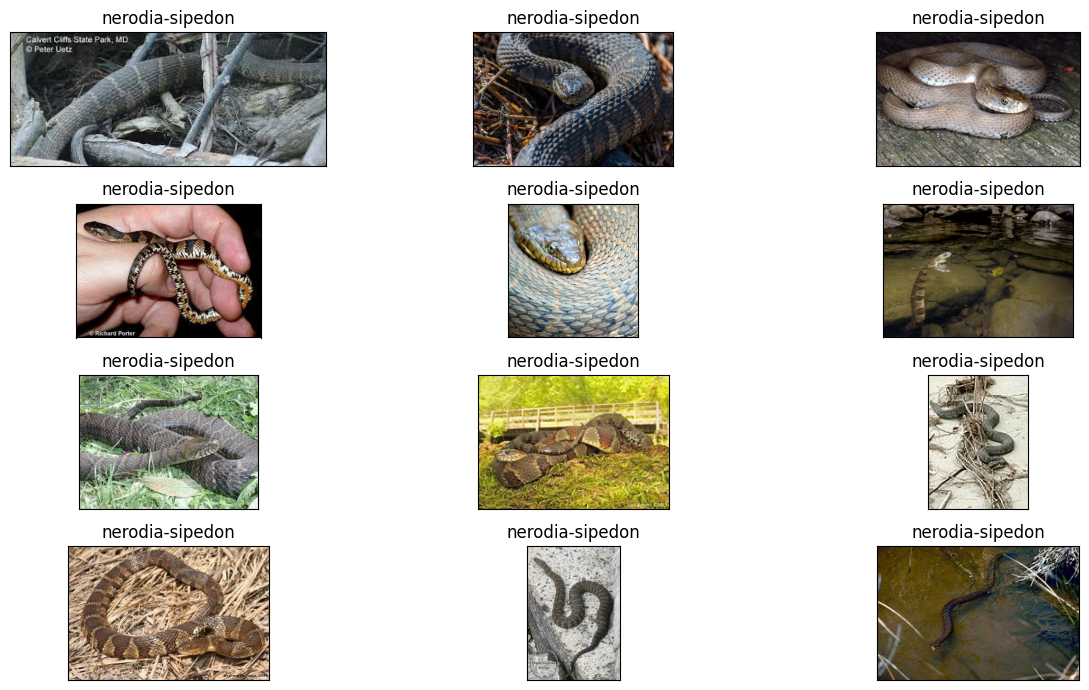

In [ ]:
import matplotlib.pyplot as plt

f,a = plt.subplots(nrows=4, ncols=3,figsize=(13, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(a.flat):
    ax.imshow(plt.imread(df.Filepath[i]))
    ax.set_title(df.Labels[i])

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.utils import shuffle
df = (df.sample(frac = 1).reset_index()).drop(columns = 'index')
df


,Filepath,Labels
0,/kaggle/input/identifying-different-breeds-of-...,lampropeltis-triangulum
1,/kaggle/input/identifying-different-breeds-of-...,agkistrodon-contortrix
2,/kaggle/input/identifying-different-breeds-of-...,storeria-dekayi
3,/kaggle/input/identifying-different-breeds-of-...,crotalus-viridis
4,/kaggle/input/identifying-different-breeds-of-...,agkistrodon-piscivorus
...,...,...
13180,/kaggle/input/identifying-different-breeds-of-...,coluber-constrictor
13181,/kaggle/input/identifying-different-breeds-of-...,pantherophis-guttatus
13182,/kaggle/input/identifying-different-breeds-of-...,nerodia-fasciata
13183,/kaggle/input/identifying-different-breeds-of-...,storeria-occipitomaculata


In [ ]:
df.Labels.value_counts()

Labels
natrix-natrix                  426
lampropeltis-triangulum        418
crotalus-atrox                 412
agkistrodon-piscivorus         410
thamnophis-sirtalis            400
pantherophis-guttatus          399
heterodon-platirhinos          395
masticophis-flagellum          393
storeria-dekayi                390
coluber-constrictor            385
nerodia-fasciata               381
storeria-occipitomaculata      379
rhinocheilus-lecontei          378
diadophis-punctatus            376
opheodrys-aestivus             376
pantherophis-obsoletus         375
pantherophis-alleghaniensis    375
crotalus-viridis               375
crotalus-scutulatus            374
lampropeltis-californiae       373
haldea-striatula               373
pituophis-catenifer            371
nerodia-erythrogaster          370
nerodia-sipedon                370
thamnophis-elegans             370
pantherophis-spiloides         368
pantherophis-vulpinus          364
agkistrodon-contortrix         360
nerodia-rhomb

In [ ]:
from PIL import Image

file_path = df.Filepath[45]

with Image.open(file_path) as img:
    width, height = img.size

print(f"Width: {width}, Height: {height}")

Width: 274, Height: 184


In [ ]:
from keras.applications import VGG16

img_rows, img_cols = 150,150

VGG16 = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_rows, img_cols, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
VGG16.trainable = False

In [ ]:
VGG16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
print(VGG16.output)

<KerasTensor shape=(None, 4, 4, 512), dtype=float32, sparse=False, name=keras_tensor_18>


In [ ]:
def addTopModelXception(bottom_model, num_classes):
    """creates the top or head of the model that will be
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(256,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [ ]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from keras.models import Model

num_classes = 35

FC_Head = addTopModelXception(VGG16, num_classes)

model = Model(inputs = VGG16.input, outputs = FC_Head)

print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 35)             │         8,995 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,117,667 (57.67 MB)

 Trainable params: 402,979 (1.54 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [ ]:
labels = train_generator.class_indices
labels

In [ ]:
## [Best Model]
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


train_ratio = .75
validation_ratio = 0.10
test_ratio = 0.25

train, test = train_test_split(df, test_size = test_ratio )
val, test = train_test_split(test, test_size=test_ratio/(test_ratio + validation_ratio))

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')


validation_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train,
        x_col='Filepath', y_col='Labels',
        target_size=(img_rows, img_cols),
        batch_size=batch_size)

validation_generator = validation_datagen.flow_from_dataframe(
        dataframe = val,
        x_col='Filepath', y_col='Labels',
        target_size=(img_rows, img_cols),
        batch_size=batch_size)

test_generator = validation_datagen.flow_from_dataframe(
        dataframe = test,
        x_col='Filepath', y_col='Labels',
        target_size=(img_rows, img_cols),
        batch_size=batch_size)

Found 9888 validated image filenames belonging to 35 classes.
Found 942 validated image filenames belonging to 35 classes.
Found 2355 validated image filenames belonging to 35 classes.


In [ ]:
## EPOCH = 25 [less accuracy]
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

nb_train_samples = 9888
nb_validation_samples = 942

epochs = 25

history = model.fit(
    train_generator,
    epochs = epochs,
    validation_data = validation_generator)
model.save("model.keras")

In [ ]:
test_accuracy = model.evaluate(test_generator)[1] * 100
print('Test accuracy is : ',test_accuracy, '%' )

In [ ]:
## EPOCH = 50 [better accuracy]
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

nb_train_samples = 9888
nb_validation_samples = 942

epochs = 50

history = model.fit(
    train_generator,
    epochs = epochs,
    validation_data = validation_generator)
model.save("model.keras")

In [ ]:
test_accuracy = model.evaluate(test_generator)[1] * 100
print('Test accuracy is : ',test_accuracy, '%' )

In [ ]:
## EPOCH = 100 [most accurate]
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

nb_train_samples = 9888
nb_validation_samples = 942

epochs = 100

history = model.fit(
    train_generator,
    epochs = epochs,
    validation_data = validation_generator)
model.save("model.keras")

Epoch 1/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 82s 252ms/step - accuracy: 0.3518 - loss: 2.2595 - val_accuracy: 0.3163 - val_loss: 2.4228
Epoch 2/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 78s 248ms/step - accuracy: 0.3837 - loss: 2.1403 - val_accuracy: 0.3068 - val_loss: 2.4683
Epoch 3/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 77s 245ms/step - accuracy: 0.4015 - loss: 2.0423 - val_accuracy: 0.3185 - val_loss: 2.3658
Epoch 4/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 78s 248ms/step - accuracy: 0.4344 - loss: 1.9645 - val_accuracy: 0.3365 - val_loss: 2.3836
Epoch 5/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 78s 248ms/step - accuracy: 0.4503 - loss: 1.8744 - val_accuracy: 0.3227 - val_loss: 2.4043
Epoch 6/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 78s 248ms/step - accuracy: 0.4714 - loss: 1.7940 - val_accuracy: 0.3439 - val_loss: 2.3702
Epoch 7/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 78s 246ms/step - accuracy: 0.4923 - loss: 1.7311 - val_accuracy: 0.3556 - val_loss: 2.3528
Epoch 8/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 78s 246ms/step - accuracy: 0.5158 -

In [ ]:
test_accuracy = model.evaluate(test_generator)[1] * 100
print('Test accuracy is : ',test_accuracy, '%' )

74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.5902 - loss: 3.1212
Test accuracy is :  59.23566818237305 %


In [ ]:
# Accessing class indices for training data generator
class_indices_train = train_generator.class_indices
class_indices_train_list = list(train_generator.class_indices.keys())


# Displaying categorical types
print("Categorical types for the training data:")
print(class_indices_train)

Categorical types for the training data:
{'agkistrodon-contortrix': 0, 'agkistrodon-piscivorus': 1, 'coluber-constrictor': 2, 'crotalus-atrox': 3, 'crotalus-horridus': 4, 'crotalus-ruber': 5, 'crotalus-scutulatus': 6, 'crotalus-viridis': 7, 'diadophis-punctatus': 8, 'haldea-striatula': 9, 'heterodon-platirhinos': 10, 'lampropeltis-californiae': 11, 'lampropeltis-triangulum': 12, 'masticophis-flagellum': 13, 'natrix-natrix': 14, 'nerodia-erythrogaster': 15, 'nerodia-fasciata': 16, 'nerodia-rhombifer': 17, 'nerodia-sipedon': 18, 'opheodrys-aestivus': 19, 'pantherophis-alleghaniensis': 20, 'pantherophis-emoryi': 21, 'pantherophis-guttatus': 22, 'pantherophis-obsoletus': 23, 'pantherophis-spiloides': 24, 'pantherophis-vulpinus': 25, 'pituophis-catenifer': 26, 'rhinocheilus-lecontei': 27, 'storeria-dekayi': 28, 'storeria-occipitomaculata': 29, 'thamnophis-elegans': 30, 'thamnophis-marcianus': 31, 'thamnophis-proximus': 32, 'thamnophis-radix': 33, 'thamnophis-sirtalis': 34}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


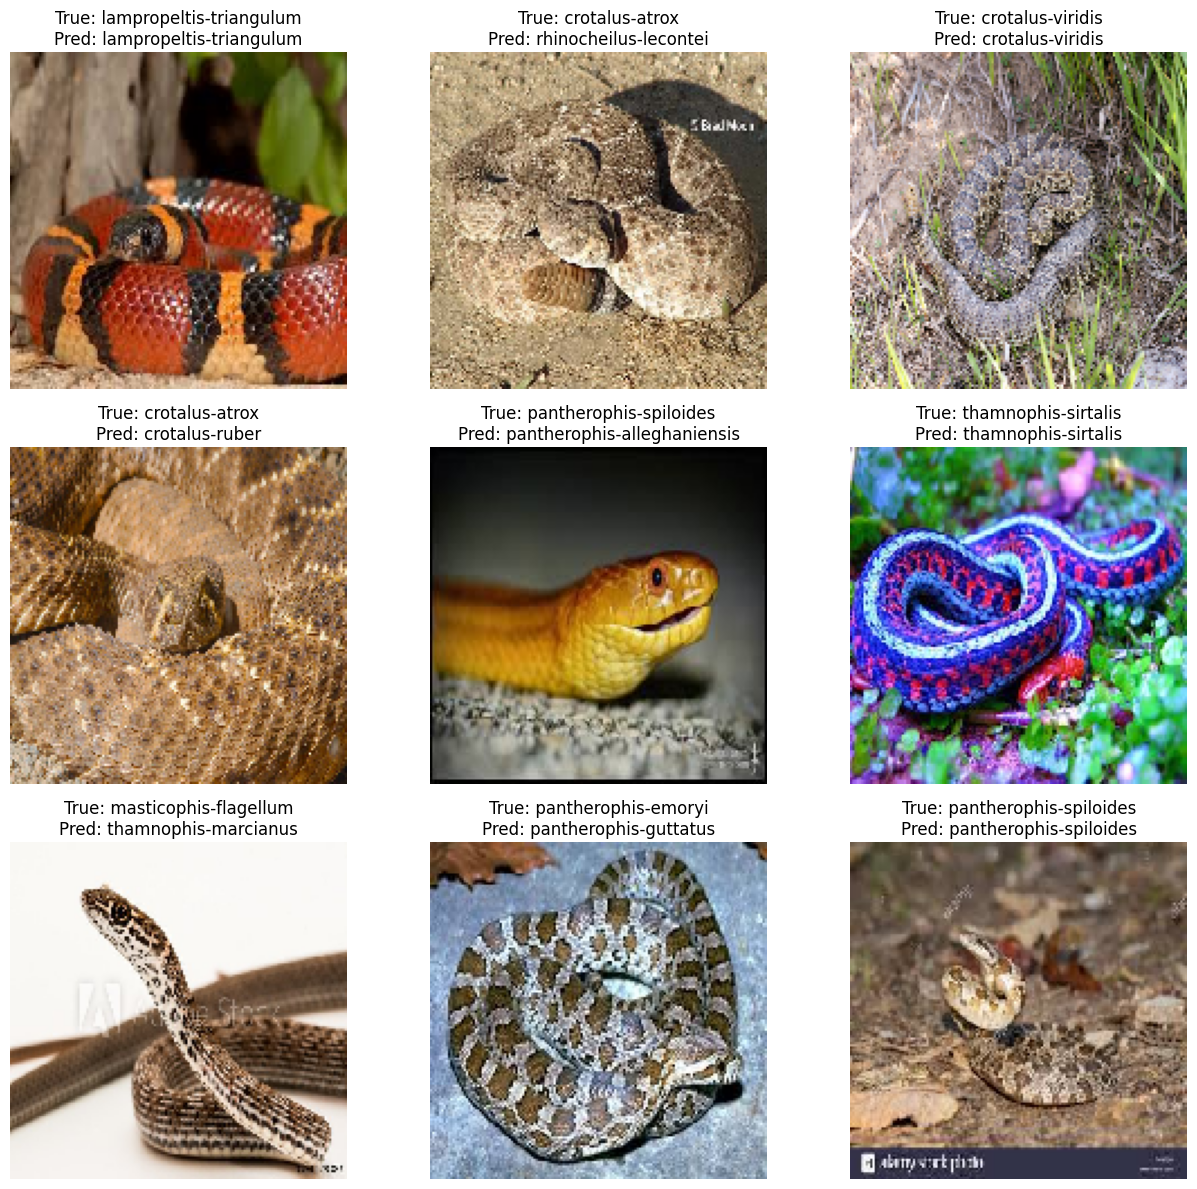

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def plot_sample_predictions(model, test_generator, categories, test_dir, num_samples=9, figsize=(13, 12)):

    images, labels = next(test_generator)

    predictions = model.predict(images)

    indices = np.random.choice(len(images), num_samples, replace=False)

    plt.figure(figsize=figsize)

    for i, index in enumerate(indices):
        image = images[index]
        true_label = np.argmax(labels[index])
        pred_label = np.argmax(predictions[index])

        plt.subplot(int(np.sqrt(num_samples)), int(np.sqrt(num_samples)), i + 1)
        plt.imshow(image)
        plt.title(f'True: {categories[true_label]}\nPred: {categories[pred_label]}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

plot_sample_predictions(
    model=model,
    test_generator=test_generator,
    categories=class_indices_train_list,
    test_dir=test_generator,
    num_samples=9,
    figsize=(13, 12)
)
